In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

complaints_ratio_df = pd.read_csv('../data/complaints_with_response_ratio.csv', delimiter=',')
complaints_sentiment_df = pd.read_csv('../data/complaints_with_sentiment_score.csv', delimiter=',')
complaints_regio_df = pd.read_csv('../data/complaints_with_region_ratio.csv', delimiter=',')

In [2]:
complaints_sentiment_df.replace({'Company response to consumer': {'Closed': 'Closed without explanation'}}, inplace= True)
complaints_sentiment_df = complaints_sentiment_df[complaints_sentiment_df['Company response to consumer'].isin(
    ['Closed with non-monetary relief',
    'Closed with monetary relief', 'Closed with explanation',
    'Closed without explanation', 'Untimely response'])]

In [3]:
print(complaints_ratio_df.shape)
print(complaints_sentiment_df.shape)
print(complaints_regio_df.shape)

(485699, 12)
(485699, 20)
(485699, 12)


In [180]:
merged_df = pd.merge(complaints_ratio_df, complaints_sentiment_df[['Complaint ID', 'Narrative sentiment score']], on='Complaint ID')
merged_df = merged_df.drop('Unnamed: 0', 1)
merged_df

,Complaint ID,Product,Narrative,Company,State,Response,Closed with explanation,Closed with non-monetary relief,Closed with monetary relief,Closed without explanation,Untimely response,Narrative sentiment score
0,3315279,"Credit reporting, repair, or other",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.155694
1,3259329,"Credit reporting, repair, or other","According to the Fair Credit Reporting Act, Se...",Experian Information Solutions Inc.,HI,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.235102
2,3266929,"Credit reporting, repair, or other",EXPERIAN HAS SOME INFORMATION ON MY CREDIT REP...,Experian Information Solutions Inc.,FL,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.215753
3,3222896,"Credit reporting, repair, or other",Accounts added and/or created unbeknownst to m...,Experian Information Solutions Inc.,FL,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.473450
4,3289721,"Credit reporting, repair, or other",I do not own this debt and demand that you imm...,Experian Information Solutions Inc.,GA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.462072
...,...,...,...,...,...,...,...,...,...,...,...,...
485694,2005685,Debt collection,"NorAm Capital Holdings, Inc. \ncollecting for ...","NorAm Capital Holdings, Inc.",CA,Closed without explanation,0.00,0.00,0.00,100.00,0.0,0.549215
485695,3038874,"Payday loan, title loan, or personal loan",fbi is involved and cc the matter- even thru f...,"3D Financial, LP",AZ,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.247246
485696,3073029,Mortgage,"Please See Attachments Based on my experience,...",Homes By Hunt LLC,LA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.672983
485697,2365852,Money transfers,I send some money to XXXX through XXXX And my ...,Maxitransfers Corporation,GA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.353015


In [181]:
merged_df = pd.merge(merged_df, complaints_regio_df[['Complaint ID', 'Region','Closed with explanation', 'Closed with non-monetary relief', 'Closed with monetary relief', 'Closed without explanation', 'Untimely response']],how='left', on='Complaint ID')
merged_df

,Complaint ID,Product,Narrative,Company,State,Response,Closed with explanation_x,Closed with non-monetary relief_x,Closed with monetary relief_x,Closed without explanation_x,Untimely response_x,Narrative sentiment score,Region,Closed with explanation_y,Closed with non-monetary relief_y,Closed with monetary relief_y,Closed without explanation_y,Untimely response_y
0,3315279,"Credit reporting, repair, or other",I have complained many times that the credit r...,Experian Information Solutions Inc.,CA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.155694,West,0.209104,0.029877,0.015800,0.002460,0.001687
1,3259329,"Credit reporting, repair, or other","According to the Fair Credit Reporting Act, Se...",Experian Information Solutions Inc.,HI,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.235102,West,0.209104,0.029877,0.015800,0.002460,0.001687
2,3266929,"Credit reporting, repair, or other",EXPERIAN HAS SOME INFORMATION ON MY CREDIT REP...,Experian Information Solutions Inc.,FL,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.215753,South,0.245480,0.039663,0.013056,0.002043,0.002051
3,3222896,"Credit reporting, repair, or other",Accounts added and/or created unbeknownst to m...,Experian Information Solutions Inc.,FL,Closed with non-monetary relief,60.68,38.55,0.73,0.04,0.0,0.473450,South,0.245480,0.039663,0.013056,0.002043,0.002051
4,3289721,"Credit reporting, repair, or other",I do not own this debt and demand that you imm...,Experian Information Solutions Inc.,GA,Closed with explanation,60.68,38.55,0.73,0.04,0.0,0.462072,South,0.245480,0.039663,0.013056,0.002043,0.002051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485694,2005685,Debt collection,"NorAm Capital Holdings, Inc. \ncollecting for ...","NorAm Capital Holdings, Inc.",CA,Closed without explanation,0.00,0.00,0.00,100.00,0.0,0.549215,West,0.209104,0.029877,0.015800,0.002460,0.001687
485695,3038874,"Payday loan, title loan, or personal loan",fbi is involved and cc the matter- even thru f...,"3D Financial, LP",AZ,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.247246,West,0.209104,0.029877,0.015800,0.002460,0.001687
485696,3073029,Mortgage,"Please See Attachments Based on my experience,...",Homes By Hunt LLC,LA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.672983,South,0.245480,0.039663,0.013056,0.002043,0.002051
485697,2365852,Money transfers,I send some money to XXXX through XXXX And my ...,Maxitransfers Corporation,GA,Closed with explanation,100.00,0.00,0.00,0.00,0.0,0.353015,South,0.245480,0.039663,0.013056,0.002043,0.002051


In [6]:
# merged_df_og = merged_df
# merged_df = merged_df_og.sample(n=5000)
# merged_df

### Zonder balancing

In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

feature_names = ['Closed with explanation_x', 'Closed with non-monetary relief_x', 'Closed with monetary relief_x',
                'Closed without explanation_x', 'Untimely response_x', 'Narrative sentiment score']
X = merged_df[feature_names]
y = merged_df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(388559, 6)
(388559,)
(97140, 6)
(97140,)


In [ ]:
model = SVC(gamma='scale')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names= merged_df['Response'].unique()))

In [ ]:

conf_mat = confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Correcte response')
plt.xlabel('Voorspelde response')
plt.title("Confusion Matrix", size=16);

In [ ]:
labels = ['Closed with explanation', 'Closed with non-monetary relief', 'Closed with monetary relief',
                'Closed without explanation', 'Untimely response']
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Correcte response')
plt.xlabel('Voorspelde response')
plt.title("Confusion Matrix", size=16);

### Met balancing

In [ ]:
def sampling_k_elements(category, k=120000):
    if len(category) < k:
        return category
    return category.sample(k)

complaints_balanced_df = merged_df.groupby('Response').apply(sampling_k_elements).reset_index(drop=True)

In [ ]:
complaints_balanced_df.shape

In [ ]:
X_bal = complaints_balanced_df[feature_names]
y_bal = complaints_balanced_df['Response']
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.2)

print(X_bal_train.shape)
print(y_bal_train.shape)

print(X_bal_test.shape)
print(y_bal_test.shape)

In [ ]:
model_bal = SVC(gamma='scale')
model_bal.fit(X_bal_train, y_bal_train)
y_bal_pred = model.predict(X_bal_test)

In [ ]:
print(metrics.classification_report(y_bal_test, y_bal_pred, target_names= complaints_balanced_df['Response'].unique()))

In [ ]:
conf_mat_bal = confusion_matrix(y_bal_test, y_bal_pred, labels=labels)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat_bal, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Correcte response')
plt.xlabel('Voorspelde response')
plt.title("Confusion Matrix", size=16);

### Met regio kansen en balancing

In [ ]:
De features die overeenkomen met de regio kansen (_y) worden nu ook toegevoegd.

In [45]:
feature_names = ['Closed with explanation_x', 'Closed with non-monetary relief_x', 'Closed with monetary relief_x',
                'Closed without explanation_x', 'Untimely response_x','Closed with explanation_y', 'Closed with non-monetary relief_y', 'Closed with monetary relief_y',
                'Closed without explanation_y', 'Untimely response_y', 'Narrative sentiment score']

In [28]:
X_bal = complaints_balanced_df[feature_names]
y_bal = complaints_balanced_df['Response']
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.2)

print(X_bal_train.shape)
print(y_bal_train.shape)

print(X_bal_test.shape)
print(y_bal_test.shape)

(170516, 6)
(170516,)
(42630, 6)
(42630,)


In [47]:
feature_names

['Closed with explanation_x',
 'Closed with non-monetary relief_x',
 'Closed with monetary relief_x',
 'Closed without explanation_x',
 'Untimely response_x',
 'Closed with explanation_y',
 'Closed with non-monetary relief_y',
 'Closed with monetary relief_y',
 'Closed without explanation_y',
 'Untimely response_y',
 'Narrative sentiment score']

In [ ]:
print(metrics.classification_report(y_bal_test, y_bal_pred, target_names= complaints_balanced_df['Response'].unique()))

In [ ]:
model_bal = SVC(gamma='scale')
model_bal.fit(X_bal_train, y_bal_train)
y_bal_pred = model.predict(X_bal_test)

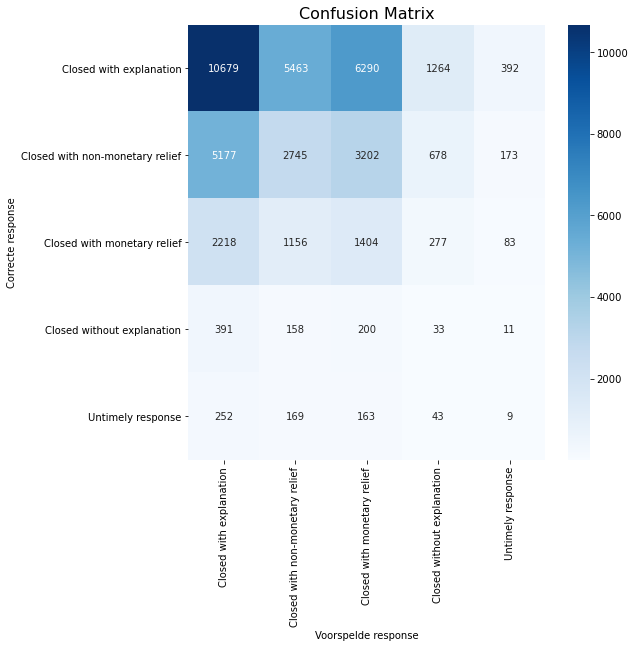

In [175]:
conf_mat_bal = confusion_matrix(y_bal_test, y_bal_pred, labels=labels)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat_bal, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Correcte response')
plt.xlabel('Voorspelde response')
plt.title("Confusion Matrix", size=16);

### Met hyperparameter tuning

De performantie van de SVM hangt af van de hyperparameter keuze. Hyperparameters zijn settings die gekozen worden door de programmeur en kunnen niet uit de data worden afgeleid.
Niet elke parameter wordt uitgevoerd, wel een vast aantal settings zijn gesampled via de gekozen distributie.

In [176]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=1000)
distributions = dict(C=uniform(loc=0, scale=4),
                    penalty=['l2', 'l1'],class_weight=['balanced','balanced','balanced','balanced','balanced','balanced','balanced','balanced','balanced','balanced','balanced'])
clf = RandomizedSearchCV(logistic, distributions)
search = clf.fit(X_bal_train,  y_bal_train)
search.best_params_



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

{'C': 1.2086209175766527, 'class_weight': 'balanced', 'penalty': 'l1'}

In [178]:
from sklearn.metrics import accuracy_score

model = search.best_estimator_
y_bal_pred = model.predict(X_bal_test)
print(accuracy_score(y_bal_pred, y_bal_test))

0.607741027445461


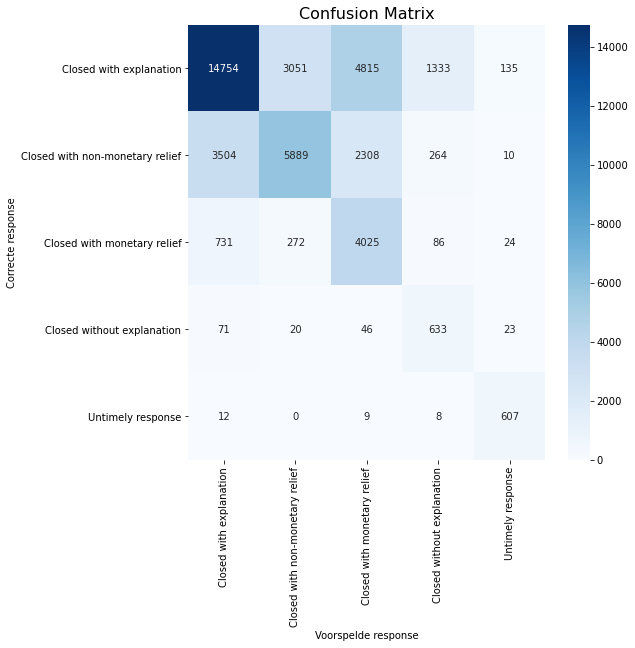

In [179]:
labels = ['Closed with explanation', 'Closed with non-monetary relief', 'Closed with monetary relief',
                'Closed without explanation', 'Untimely response']
conf_mat_bal = confusion_matrix(y_bal_test, y_bal_pred, labels=labels
                               )
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat_bal, annot=True, cmap="Blues", fmt='d', xticklabels=labels, yticklabels=labels)
plt.ylabel('Correcte response')
plt.xlabel('Voorspelde response')
plt.title("Confusion Matrix", size=16);